# APIs and Python

## The Many Use Cases For APIs

APIs can actually be used for many things - not just for retrieving information. Twilio has an API that allows you to write a script to call their API to send text messages to people. GitHub has an API for creating new repositories. Many services have an API allowing a computer to automate a task that a person might otherwise have to do through a website - whether uploading a photo to Flickr, searching for a company name in a state database or getting a list of garbage collection times for a municipality.

### _Learning Goals:_<br/>
  - Identify and discuss APIs
  - Discuss and explain different request (GET, POST, PUT, DELETE) and CRUD operations
  - Explore the attributes of a response object
  - Check the status of a request and interpret status codes
  - Access data from an API using the requests library
  - Create a pandas dataframe from the data returned from an API and visualize the data
  - If time, target an API of their own!!!

## Limitations of APIs
When working with APIs, there are some limitations you have to be aware of - especially relating to scope and scale.

* **Scope** - Just because a company has an API and has information, it doesn't mean you can get all of the information through their API. 

* **Scale** - Some APIs are provided for free as a public service. Others you have to pay for, or allow you to perform activities (like sending a text message) that you pay for. Make sure that you know what the rate limits are and that your use case isn't going to need more API calls than you will be able to make.

Let's take a look at the `requests` library and it's uses.

### "Requests is the only Non-GMO HTTP library for Python, safe for human consumption."

![img-req](requests-pic.jpeg)

> "Requests allows you to send organic, grass-fed HTTP/1.1 requests, without the need for manual labor."

Straight from the `requests` [documentation](https://pypi.org/project/requests/)

### Let's get started!

In [2]:
import requests

In [ ]:
# Don't already have the library? Uncomment the below code and install it
#!pip install requests

### Types of requests

We will mostly use GET requests in order to get data, but there are other options.

![CRUD image from IntelliPaat](https://intellipaat.com/mediaFiles/2015/08/MongoDB-CRUD-operations.jpg)

That's right - CRUD summarizes the kinds of requests you can make with most APIs. 

Let's say you are looking at an API for a car rental company like Hertz or Zipcar - the following different requests could generate these different responses:

| Request               | Result                               | In CRUD Terms |
| --------------------- | ------------------------------------ | ------------- |
| GET /stores/          | User sees the list of stores         | Read          |
| GET /rentals/         | User sees the history of car rentals | Read          |
| POST /rentals/        | User rents a car                     | Create        |
| PUT /rentals/{id}/    | User changes destination store       | Update        |
| DELETE /rentals/{id}/ | User cancels the active car rental   | Delete        |


### Request Class and Attributes

In [3]:
# Create a GET request, then check the type of object

r = requests.get('https://api.github.com/events') 
type(r)

requests.models.Response

In [4]:
# So what does this look like?
r.text

'[{"id":"10918061610","type":"PullRequestReviewCommentEvent","actor":{"id":931163,"login":"vishakh","display_login":"vishakh","gravatar_id":"","url":"https://api.github.com/users/vishakh","avatar_url":"https://avatars.githubusercontent.com/u/931163?"},"repo":{"id":135016498,"name":"Cryptonomic/ConseilJS","url":"https://api.github.com/repos/Cryptonomic/ConseilJS"},"payload":{"action":"created","comment":{"url":"https://api.github.com/repos/Cryptonomic/ConseilJS/pulls/comments/349178331","pull_request_review_id":321003787,"id":349178331,"node_id":"MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDM0OTE3ODMzMQ==","diff_hunk":"@@ -90,7 +92,8 @@ export namespace TezosConseilClient {\\n     export async function getOperationGroup(serverInfo: ConseilServerInfo, network: string, operationGroupID: string): Promise<any[]> {\\n         const query = ConseilQueryBuilder.setLimit(ConseilQueryBuilder.addPredicate(ConseilQueryBuilder.blankQuery(), \'hash\', ConseilOperator.EQ, [operationGroupID], false), 1);\\n 

![Oh good heavens gif, from gfycat](https://thumbs.gfycat.com/ColdAmbitiousDogwoodtwigborer-size_restricted.gif)

Obviously you're never going to just scan that quickly for any data you need, we need to wrangle that response to make it usable.

But first, let's look at some of the other attributes of `requests.models.Response` objects.

We can check out all of the attributes [here](https://2.python-requests.org//en/v0.10.6/api/) in the documentation.

In [ ]:
# Another attribute, what does this show us?
r.headers

### Checking out the status of your request

In [7]:
# Another attribute
r.status_code

200

### [Types of status codes](https://http.cat/)

1xx - Informational responses

2xx - Success
- 200 OK
- 201 Created
- 204 No Content

3xx - Redirection

- 301 Moved Permanently (permanent URL redirection)
- 304 Not Modified (A conditional GET or HEAD request has been received and would have resulted in a 200 OK response if it were not for the fact that the condition evaluated to false.)

4xx - Client errors

- 400 Bad Request
- 401 Unauthorized
- 403 Forbidden
- 404 Not Found

5xx - Server errors

- 500 Internal Server Error

In [8]:
# Get status code for a "broken" link

r_broken = requests.get('https://api.github.com/fake-ending')
r_broken.status_code

404

Can also explictly ask for the returned format to be json as a method.

In [10]:
# Going back to our working request - how does this look, compared to text?
r.json()

[{'id': '10918061610',
  'type': 'PullRequestReviewCommentEvent',
  'actor': {'id': 931163,
   'login': 'vishakh',
   'display_login': 'vishakh',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/vishakh',
   'avatar_url': 'https://avatars.githubusercontent.com/u/931163?'},
  'repo': {'id': 135016498,
   'name': 'Cryptonomic/ConseilJS',
   'url': 'https://api.github.com/repos/Cryptonomic/ConseilJS'},
  'payload': {'action': 'created',
   'comment': {'url': 'https://api.github.com/repos/Cryptonomic/ConseilJS/pulls/comments/349178331',
    'pull_request_review_id': 321003787,
    'id': 349178331,
    'node_id': 'MDI0OlB1bGxSZXF1ZXN0UmV2aWV3Q29tbWVudDM0OTE3ODMzMQ==',
    'diff_hunk': "@@ -90,7 +92,8 @@ export namespace TezosConseilClient {\n     export async function getOperationGroup(serverInfo: ConseilServerInfo, network: string, operationGroupID: string): Promise<any[]> {\n         const query = ConseilQueryBuilder.setLimit(ConseilQueryBuilder.addPredicate(ConseilQueryBuild

#### A note on errors and exceptions with the Requests library

There are a number of exceptions and error codes you need to be familiar with when using the Requests library in Python.

- The Requests library will raise a ConnectionError exception if there is a network problem like a DNS failure, or refused connection.
- These are rare, but with invalid HTTP responses, Requests will also raise an HTTPError exception. 
- A Timeout exception will be raised if a request times out.
- If and when a request exceeds the preconfigured number of maximum redirections, then a TooManyRedirects exception will be raised

## Moving On

Now that we know a bit more about APIs and how to interact with them in Python, let's actually investigate an API from scratch. 

To start, go over to the API documentation [here](https://dev.socrata.com/foundry/data.cityofnewyork.us/fhrw-4uyv)

<img src="311_api_docs.png">

## Make an initial API call to retrieve 311 complaints from a neighborhood or zip code of your choice in New York City.

### Using Requests

In [11]:
import requests
import pandas as pd

zip_code = '11004'

# can't figure out date ranges at the moment...
start_date = '2018-01-01T12:00:00'
end_date = '2018-02-01T12:00:00'

# create pull request based on parameters
# https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9 click API

url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json?incident_zip={}".format(zip_code)

# do the pull
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
else:
    print('Hit an error.')

## Briefly Explore the Structure of the Response You Received.

### Let's look at the output of our API call to NYC 311

In [12]:
# What type is our data?
print(type(data))

<class 'list'>


In [13]:
# Size?
len(data)

1000

In [17]:
# Let's check one of the items out
data[20]

{'unique_key': '43885407',
 'created_date': '2019-09-24T13:39:38.000',
 'agency': 'DOHMH',
 'agency_name': 'Department of Health and Mental Hygiene',
 'complaint_type': 'Mobile Food Vendor',
 'descriptor': 'Garbage',
 'location_type': 'Mobile Food Vendor',
 'incident_zip': '11004',
 'incident_address': '254-20 HILLSIDE AVENUE',
 'street_name': 'HILLSIDE AVENUE',
 'cross_street_1': 'LITTLE NECK PARKWAY',
 'cross_street_2': '255 STREET',
 'intersection_street_1': 'LITTLE NECK PARKWAY',
 'intersection_street_2': '255 STREET',
 'city': 'GLEN OAKS',
 'landmark': 'HILLSIDE AVENUE',
 'status': 'In Progress',
 'resolution_description': 'The Department of Health and Mental Hygiene has received and processed your complaint. All restauran',
 'resolution_action_updated_date': '2019-09-25T10:05:21.000',
 'community_board': '13 QUEENS',
 'bbl': '4087820064',
 'borough': 'QUEENS',
 'x_coordinate_state_plane': '1063695',
 'y_coordinate_state_plane': '207639',
 'open_data_channel_type': 'ONLINE',
 'par

### Libraries for company-specific APIs

Google has its own libraries you can import to access their APIs. NYC also uses the `sodapy` library, Socrata, to manage their open data. 

## Create a Pandas DataFrame of the Data From the Response

In [18]:
df = pd.DataFrame(data)

In [19]:
print(len(df))
print(df.columns)
df.head()

1000
Index(['unique_key', 'created_date', 'agency', 'agency_name', 'complaint_type',
       'descriptor', 'location_type', 'incident_zip', 'incident_address',
       'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'city', 'landmark',
       'status', 'community_board', 'bbl', 'borough',
       'x_coordinate_state_plane', 'y_coordinate_state_plane',
       'open_data_channel_type', 'park_facility_name', 'park_borough',
       'latitude', 'longitude', 'location', 'location_address',
       'location_city', 'location_state', 'location_zip', 'address_type',
       'closed_date', 'resolution_description',
       'resolution_action_updated_date', 'facility_type', 'due_date',
       'taxi_pick_up_location'],
      dtype='object')


,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,...,location_city,location_state,location_zip,address_type,closed_date,resolution_description,resolution_action_updated_date,facility_type,due_date,taxi_pick_up_location
0,44972128,2019-11-19T16:15:05.000,DOT,Department of Transportation,Sidewalk Condition,Broken Sidewalk,Sidewalk,11004,264-52 73 AVENUE,73 AVENUE,...,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44967931,2019-11-19T12:27:00.000,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,11004,268-09 78 AVENUE,78 AVENUE,...,,,,ADDRESS,NaN,NaN,NaN,NaN,NaN,NaN
2,44971931,2019-11-20T05:27:34.000,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,NaN,11004,82-53 261 STREET,261 STREET,...,,,,NaN,2019-11-20T08:42:00.000,The Police Department reviewed your complaint ...,2019-11-20T08:41:00.000,NaN,NaN,NaN
3,44969776,2019-11-19T16:22:33.000,DPR,Department of Parks and Recreation,Dead/Dying Tree,Planted Less Than 2 Years Ago,Street/Curbside,11004,83-27 265 STREET,265 STREET,...,,,,NaN,2019-11-20T09:24:51.000,The Department of Parks and Recreation visited...,2019-11-20T09:24:51.000,NaN,NaN,NaN
4,44973136,2019-11-19T16:20:51.000,DPR,Department of Parks and Recreation,Damaged Tree,Branch Cracked and Will Fall,Street/Curbside,11004,83-28 265 STREET,265 STREET,...,,,,NaN,NaN,The Department of Parks and Recreation has rev...,2019-11-20T09:18:48.000,NaN,NaN,NaN


## Create a Chart of Complaint Types 

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

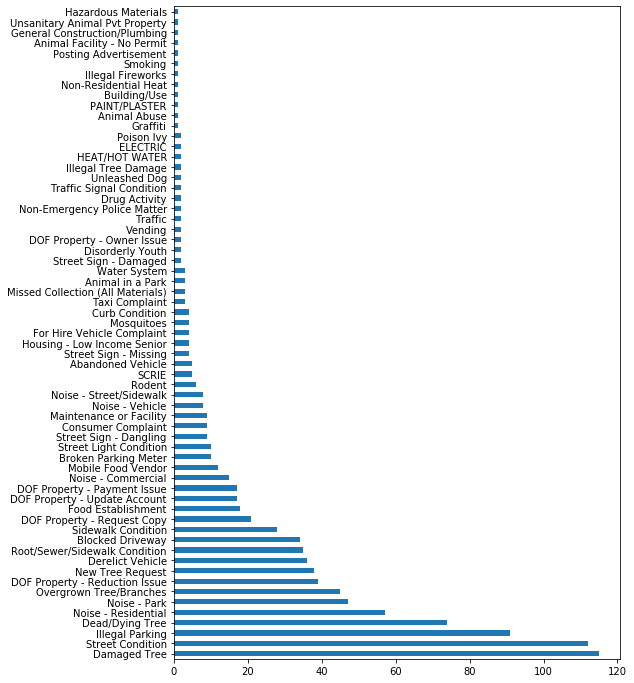

In [25]:
df.complaint_type.value_counts().plot(kind='barh', figsize=(8,12))
plt.show()

## Extra credit - Further Practice

In [ ]:
# Install before running 
# !pip install sodapy

#### Tokenize yourself, B!

https://dev.socrata.com/foundry/data.cityofnewyork.us/fhrw-4uyv

Scroll down and click to sign up for an app token! This is instantaneous and simple. No credit cards required!


In [ ]:
token = '' 

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", token)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("fhrw-4uyv", incident_zip = '11004', limit=1000)

In [ ]:
type(results)

In [ ]:
len(results)

In [ ]:
results[0]

In [ ]:
df_soda = pd.DataFrame(results)

print(len(df_soda))
print(df_soda.columns)
df_soda.head()

## Even Further Practice

https://github.com/toddmotto/public-apis

Find a buddy, find a free api, get the key, and do a GET. Try to transform the response into a df.